# Author - Ranjan Das
# Data Science and Business Analytics Intern @ The Sparks Foundation
# Task 3 - Exploratory Data Analysis on Super Store dataset

<center></center>

<center><img src="https://media.glassdoor.com/sqll/2143300/the-sparks-foundation-squarelogo-1556515236044.png"></img></center>

### Project objectives -
The following are the project objectives-

Performing EDA on the data to derive insights on how the profits can be increased.

*   Performing EDA on the data to derive insights on how the profits can be increased.
*   Discovering the weak areas of the sales deparment in order to improve the sales.
*   Discovering hidden trends within the data that will allow the sales deparment to cater to region-specific needs of the buyers.

## Importing Libraries

In [1]:
## importing most fundamental libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Importing dataset

In [2]:
myUrl = "https://raw.githubusercontent.com/Ranjan-Das-cloud/TheSparksFoundation-task3/main/raw-data/SampleSuperstore.csv"
mydf = pd.read_csv(myUrl)
mydf.sample(10)
print('Dataset has been imported successfully !!')

Dataset has been imported successfully !!


In [3]:
mydf.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9864,Standard Class,Home Office,United States,Richmond,Indiana,47374,Central,Technology,Accessories,159.800,4,0.0,70.3120
3493,Standard Class,Corporate,United States,Saint Cloud,Minnesota,56301,Central,Technology,Accessories,72.000,4,0.0,12.9600
3679,Standard Class,Consumer,United States,Clinton,Maryland,20735,East,Furniture,Furnishings,181.960,2,0.0,20.0156
3959,Standard Class,Consumer,United States,Nashville,Tennessee,37211,South,Furniture,Furnishings,44.760,3,0.2,14.5470
8256,Standard Class,Consumer,United States,Seattle,Washington,98103,West,Office Supplies,Storage,46.740,3,0.0,11.6850
5360,Standard Class,Corporate,United States,Fayetteville,North Carolina,28314,South,Furniture,Bookcases,198.272,8,0.2,-32.2192
8218,Standard Class,Consumer,United States,Dallas,Texas,75217,Central,Furniture,Furnishings,31.776,3,0.6,-19.0656
9547,Second Class,Corporate,United States,Philadelphia,Pennsylvania,19134,East,Office Supplies,Paper,6.848,2,0.2,2.1400
5386,Standard Class,Consumer,United States,Rogers,Arkansas,72756,South,Office Supplies,Binders,40.410,9,0.0,18.5886
11,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,911.424,4,0.2,68.3568


In [4]:
mydf.shape

(9994, 13)

## Data Cleaning or Data Wrangling

In this section, we will clean our dataset, removing all the unnecessary noise or null values in the data. As the first step, let us check for any null values within the dataset.

#### Finding and Removing null values and duplicated values

In [5]:
#Handling missing data
mydf.isnull().sum(axis = 0).to_frame()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [6]:
print("total number of null values = ",mydf.isnull().sum().sum())

total number of null values =  0


In [7]:
#Handling duplicate records
duplicate_entries=mydf.duplicated()
print('Total number of duplicate entries has been made : ', duplicate_entries.sum())
mydf[duplicate_entries]

Total number of duplicate entries has been made :  17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [8]:
mydf.drop_duplicates(inplace=True)

In [9]:
mydf.shape

(9977, 13)

#### Statistical details and Full summary of the dataset

In [10]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [11]:
mydf.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


#### Optimizing the storage while analysing dataset and performing EDA

In [12]:
mydf.dtypes.to_frame()

,0
Ship Mode,object
Segment,object
Country,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object
Sales,float64


In [13]:
print('Current Memory Usage for our dataset is : {} KB'.format(round(mydf.memory_usage().sum()/1024)))

Current Memory Usage for our dataset is : 1091 KB


In [14]:
mydf['Postal Code'] = mydf['Postal Code'].astype('int32')
mydf['Sales'] = mydf['Sales'].astype('float32')
mydf['Quantity'] = mydf['Quantity'].astype('int32')
mydf['Discount'] = mydf['Discount'].astype('float32')
mydf['Profit'] = mydf['Profit'].astype('float32')

In [15]:
print('After optimizing datatypes, Memory Usage for our dataset is now : {} KB'.format(round(mydf.memory_usage().sum()/1024)))

After optimizing datatypes, Memory Usage for our dataset is now : 896 KB


#### Removing the outliers from our dataset and replacing them with boundary values

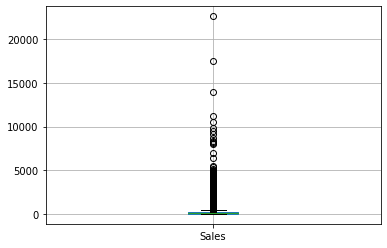

In [16]:
#Handling outliers
mydf.boxplot(column=["Sales"])
plt.show()

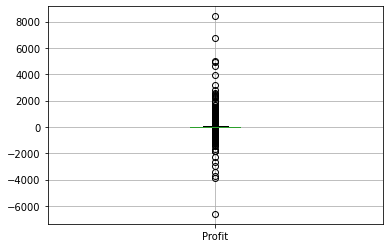

In [17]:
mydf.boxplot(column=["Profit"])
plt.show()

##### Constructing a function to remove extreme outliers which do not lie between 20-80 percentile of data for the columns

In [18]:
# constructing a function to remove extreme outliers which do not lie between 20-80 percentile of data for the columns
def remove_extreme_outlier(column):
  sorted(column)
  q1,q3=column.quantile([0.2,0.8])
  IQR=q3-q1
  lower_bound=q1-(1.5*IQR)
  upper_bound=q3+(1.5*IQR)
  return lower_bound, upper_bound

In [19]:
lower_bound,upper_bound=remove_extreme_outlier(mydf['Sales'])
mydf['Sales']=np.where(mydf['Sales'] >= upper_bound,upper_bound,mydf['Sales'])
mydf['Sales']=np.where(mydf['Sales'] <= lower_bound,lower_bound,mydf['Sales'])

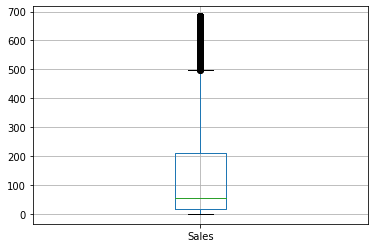

In [20]:
mydf.boxplot(column=['Sales'])
plt.show()

In [21]:
lower_bound,upper_bound=remove_extreme_outlier(mydf['Profit'])
mydf['Profit']=np.where(mydf['Profit'] >= upper_bound,upper_bound,mydf['Profit'])
mydf['Profit']=np.where(mydf['Profit'] <= lower_bound,lower_bound,mydf['Profit'])

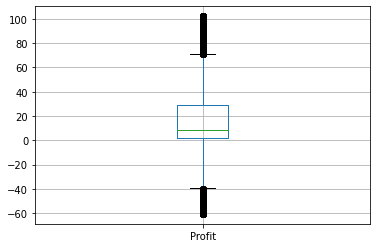

In [22]:
mydf.boxplot(column=['Profit'])

In [23]:
mydf.shape

(9977, 13)

##### Since we will be working with some geographical plots, let us map the state names to state codes.

In [24]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
mydf['state_code'] = mydf.State.apply(lambda x: state_code[x])
mydf.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,state_code
3827,Standard Class,Corporate,United States,Detroit,Michigan,48234,Central,Furniture,Chairs,683.757568,5,0.0,102.221138,MI
9755,Second Class,Consumer,United States,Richmond,Virginia,23223,South,Office Supplies,Storage,332.940002,3,0.0,9.988200,VA
7588,Standard Class,Consumer,United States,Roseville,California,95661,West,Furniture,Furnishings,17.309999,3,0.0,5.193000,CA
3317,Standard Class,Consumer,United States,Redlands,California,92374,West,Office Supplies,Art,181.350006,9,0.0,48.964500,CA
6535,Standard Class,Consumer,United States,Buffalo,New York,14215,East,Furniture,Bookcases,683.757568,10,0.2,-50.098000,NY
3713,First Class,Consumer,United States,Seattle,Washington,98103,West,Furniture,Furnishings,162.600006,3,0.0,34.146000,WA
9303,Second Class,Corporate,United States,Mcallen,Texas,78501,Central,Office Supplies,Paper,15.552000,3,0.2,5.443200,TX
6626,Standard Class,Consumer,United States,New York City,New York,10024,East,Technology,Machines,683.757568,4,0.0,102.221138,NY
628,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Binders,15.240000,5,0.2,5.143500,CA
1449,Standard Class,Corporate,United States,Los Angeles,California,90008,West,Technology,Phones,88.751999,3,0.2,11.094000,CA


##### Here, we can see the shape of mydf remains same.

As we can see, there are no null values in our dataset. 
By the looks of it, the data seems pre-processed and requires no further cleaning. We can move on to performing our EDA task.

## Exploratory Data Analysis [EDA]

In this section, we will perform EDA on our dataset, with an aim to uncover the hidden trends within the data which might help the superstore to increase their profits.

#### The total sales per state and the revenue generated as shown below

In [25]:
state_info = mydf[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_info.index, 
    z = state_info.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

Observations noted from the above given geographical plot -


*   The company has the highest sales in the state of California (shown in dark maroon), selling around 450K dollars of goods.
*   New York (bright red, top right) is the state with the second highest sales, with more that 300k dollars worth of goods sold.
*   The states of Texas (bottommost, orange) and Washington (top left, orange) end up third and fourth on the top sales charts with around $170K and 140K in sales respectively.
*   If we look at the overall data, we will observe that the supermarket company does most of its business in East Coast and West Coast region. In fact, the total sales in the state of New York is more than the sales in all of the Central America combined.

In [26]:
fig = go.Figure(data=go.Choropleth(
    locations=state_info.index, # Spatial coordinates
    z = state_info.Profit, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,0,0)'], [0.25, 'rgb(255,255,255)'], [0.45, 'rgb(124,208,247)'], [0.6, 'rgb(97,255,140)'], [1, 'rgb(8,181,0)']],
#     reversescale = True,
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limite map scope to USA
    height=800,
)

The observations from the above plot are:


*   The states in shades of green, namely New York, California and Washington are the most profitable for the company, with profits of over 30K dollars.
*   The states in teal and blue, with an average profit of around 25K dollars are mostly situated in the north-east and south-east region.
*   The state of Texas, with the third highest sales proved to be the most expensive state for the company with a very high loss of around 25K dollars.





#### Finding the correlations between each column

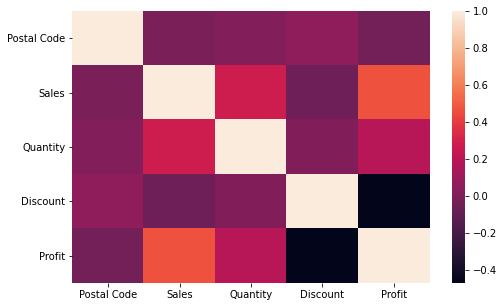

In [27]:
fig, axes = plt.subplots(1,1, figsize = (8,5))
sb.heatmap(mydf.corr())
plt.show()

In [28]:
mydf.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.009673,0.013110,0.059225,-0.036587
Sales,-0.009673,1.000000,0.270800,-0.053430,0.467279
Quantity,0.013110,0.270800,1.000000,0.008678,0.193814
Discount,0.059225,-0.053430,0.008678,1.000000,-0.470086
Profit,-0.036587,0.467279,0.193814,-0.470086,1.000000


##### Observation -2: Postal Code has a slight positive correlation with discount which has a strong negative correlation with Profit. Hence, the postal code column can't be removed/dropped. 

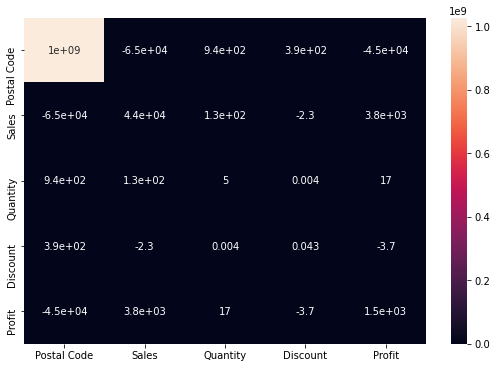

In [29]:
## finding the covarience
fig,axes = plt.subplots(1,1,figsize=(9,6))
sb.heatmap(mydf.cov(), annot= True)
plt.show()

#### Visualizing different plots with distribution of data

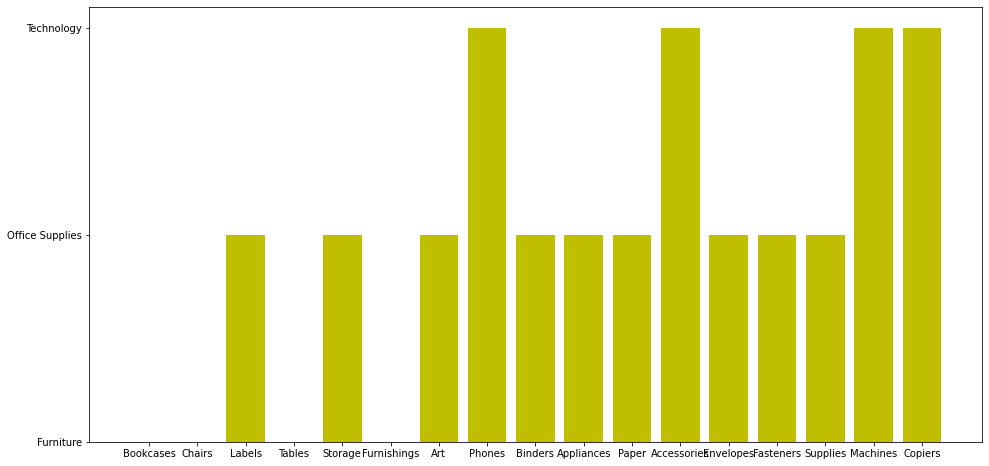

In [30]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=mydf, color='y')
plt.show()

Observation -3: From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

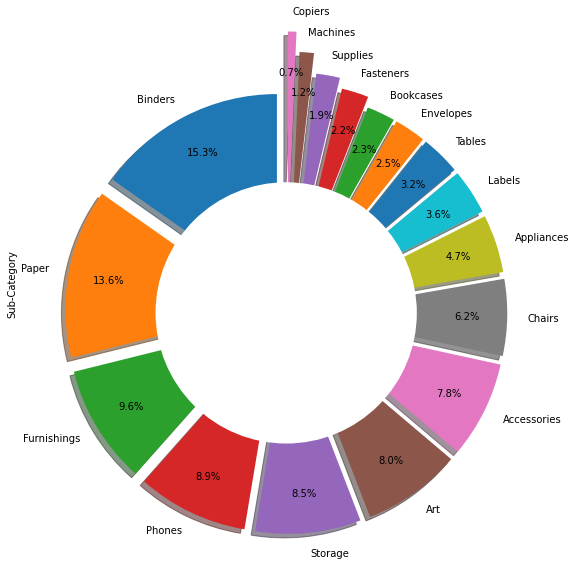

In [31]:
plt.figure(figsize=(8,8))
mydf['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%", shadow=True, startangle=90, pctdistance=0.80, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.15,0.2,0.3,0.4])
circle = plt.Circle((0,0),0.65,fc='white')
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

Observation -4: The store has wide variety of Office Supplies especially in Binders and Paper department.

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

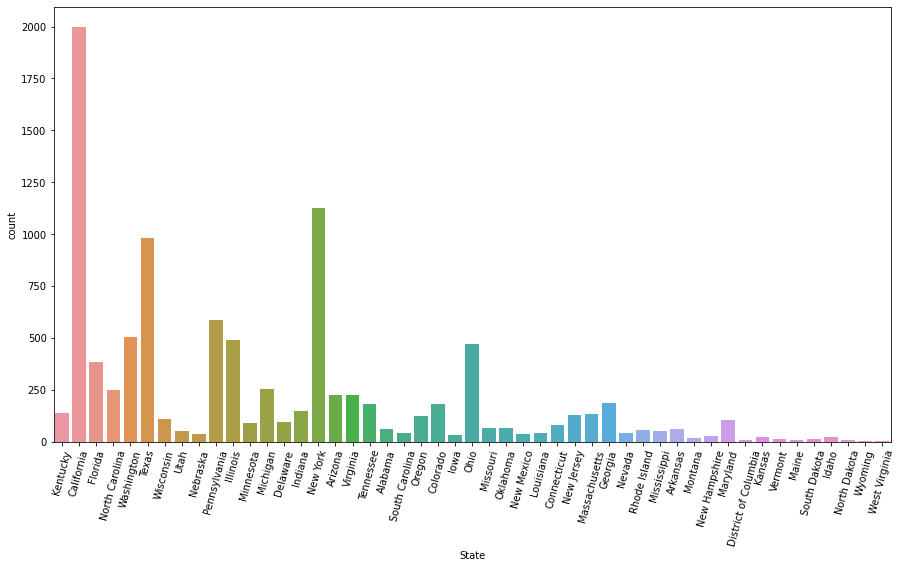

In [32]:
print(mydf['State'].value_counts())
plt.figure(figsize=(15,8))
sb.countplot(x=mydf['State'])
plt.xticks(rotation=75)
plt.show()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


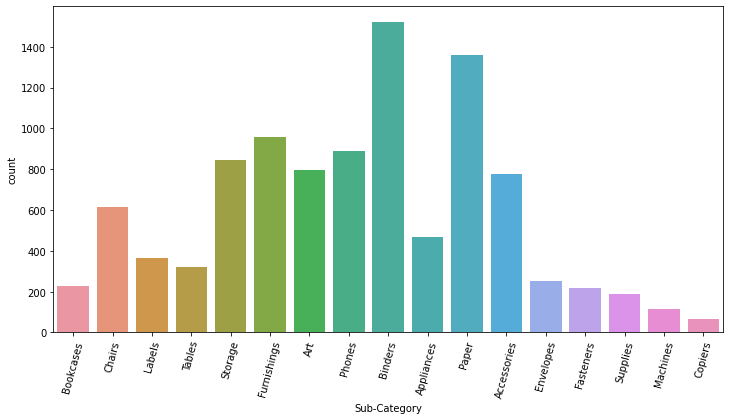

In [33]:
print(mydf['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sb.countplot(x=mydf['Sub-Category'])
plt.xticks(rotation=75)
plt.show()

Observation -5: We can see here, what is the name of state where total number of order placed both maximum and minimum as well as what is the maximum and minimum bought items.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



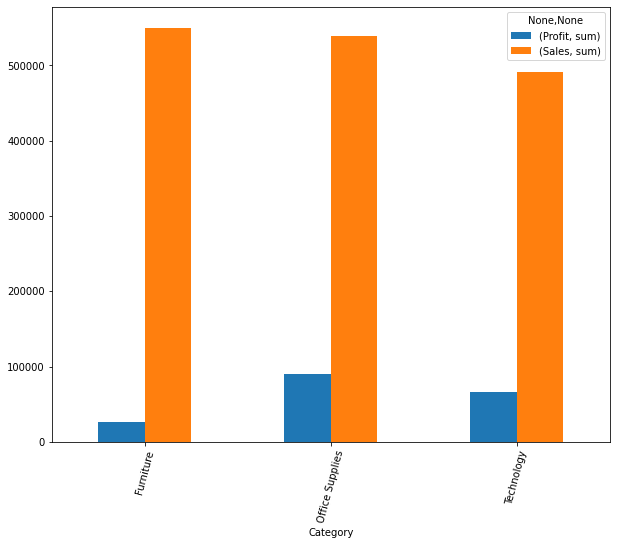

In [34]:
mydf.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,8))
plt.xticks(rotation=75)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



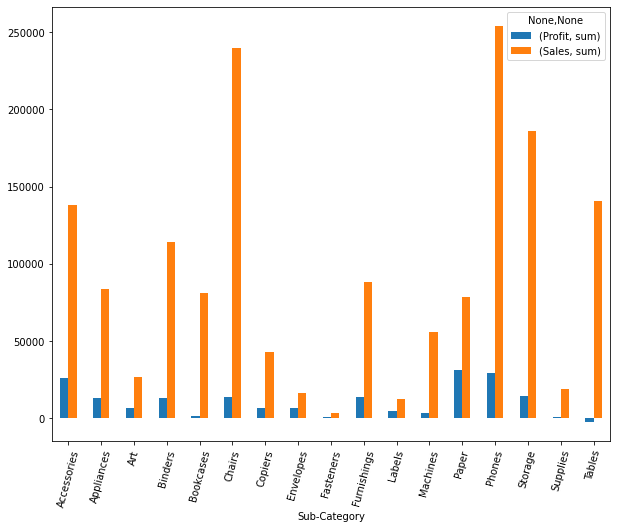

In [35]:
mydf.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,8))
plt.xticks(rotation=75)
plt.show()

Observation -6 (a): 


*   Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.
*   Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.



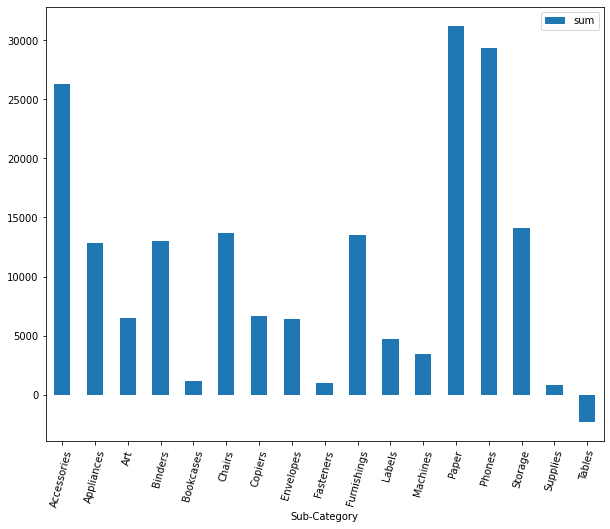

In [36]:
mydf.groupby('Sub-Category')['Profit'].agg(['sum']).plot.bar(figsize=(10,8))
plt.xticks(rotation=75)
plt.show()

#### feature engineering price_to_sales ratio

Now, let us have a look at the profit to sales ratio of each state. The profit-to-sales ratio tells us how much the store has to sell in that state in order to make profit.
*   The higher the profit-to-sales ratio, the more profit returns the store gets in the state for each sale they make.
*   A lower ratio denotes that the store has to make a lot more sales in order to make the same amount of profit as compared to a state with a higher profit-to-sales ratio.
*   States with a negative profit-to-sales ratio denote a higher loss on each sale they make.





In [37]:
state_info

,Sales,Profit
state_code,,
AL,12918.706055,2345.449707
AR,9961.177734,2398.059814
AZ,31464.195312,679.079346
CA,330756.062500,51041.980469
CO,26913.996094,304.394989
CT,12143.875000,2552.898193
DE,14258.664062,3379.407715
FL,54103.460938,1807.289062
GA,31489.175781,7164.836914


In [38]:
state_info['profit_to_sales'] = state_info['Profit'] / state_info['Sales']

# adding state name
state_name = {v: k for k, v in state_code.items()}
state_info['States'] = state_info.index
state_info['States'] = state_info.States.apply(lambda x: state_name[x])

# sorting the dataframe
state_info = state_info.sort_values(by = ['profit_to_sales'], ascending=True)

In [39]:
state_info

,Sales,Profit,profit_to_sales,States
state_code,,,,
PA,83498.156250,-3645.368896,-0.043658,Pennsylvania
IL,66768.664062,-2208.740967,-0.033081,Illinois
OH,61816.566406,-1766.835205,-0.028582,Ohio
TX,130494.617188,-3606.399170,-0.027636,Texas
TN,23083.957031,51.696163,0.002239,Tennessee
CO,26913.996094,304.394989,0.011310,Colorado
OR,16407.173828,309.793671,0.018882,Oregon
AZ,31464.195312,679.079346,0.021583,Arizona
FL,54103.460938,1807.289062,0.033404,Florida


##### Observation - 6 (b) : From the above dataframe, we can see the weak areas where the profit as well as profit_to_sales ratio has negative values.

Now, let us analyze the sales of a few random states from each profit bracket (high profit, medium profit, low profit, low loss and high loss) and try to observe some crucial trends which might help us in increasing the sales.

We have a few questions to answer here.
What products do the most profit making states buy?
What products do the loss bearing states buy?
What product segment needs to be improved in order to drive the profits higher?

*   What products do the most profit making states buy?
*   What products do the loss bearing states buy?
*   What product segment needs to be improved in order to drive the profits higher?





In [40]:
def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_info = mydf.groupby(['State'])
    for state in states:
        data = product_info.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sb.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

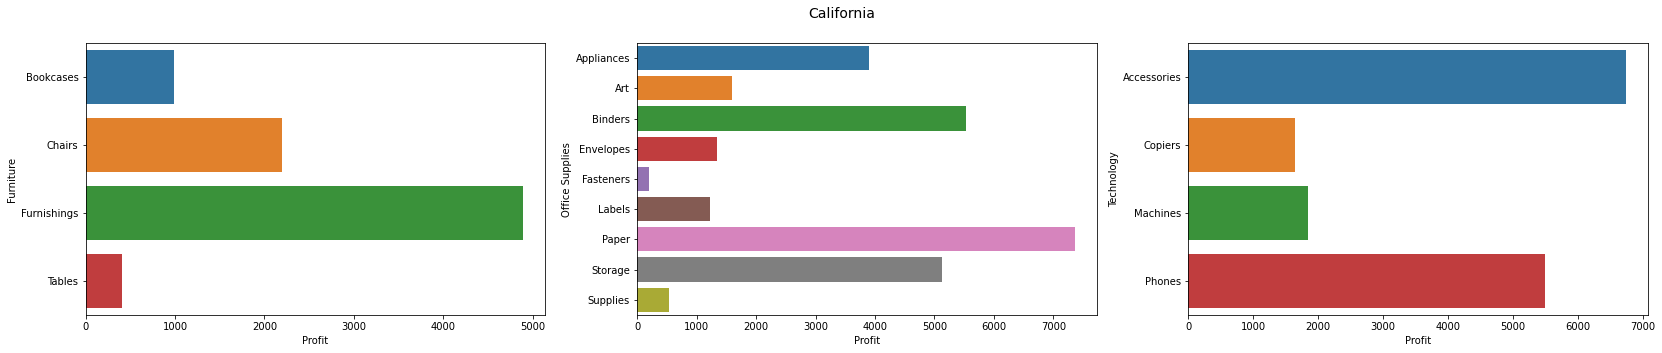

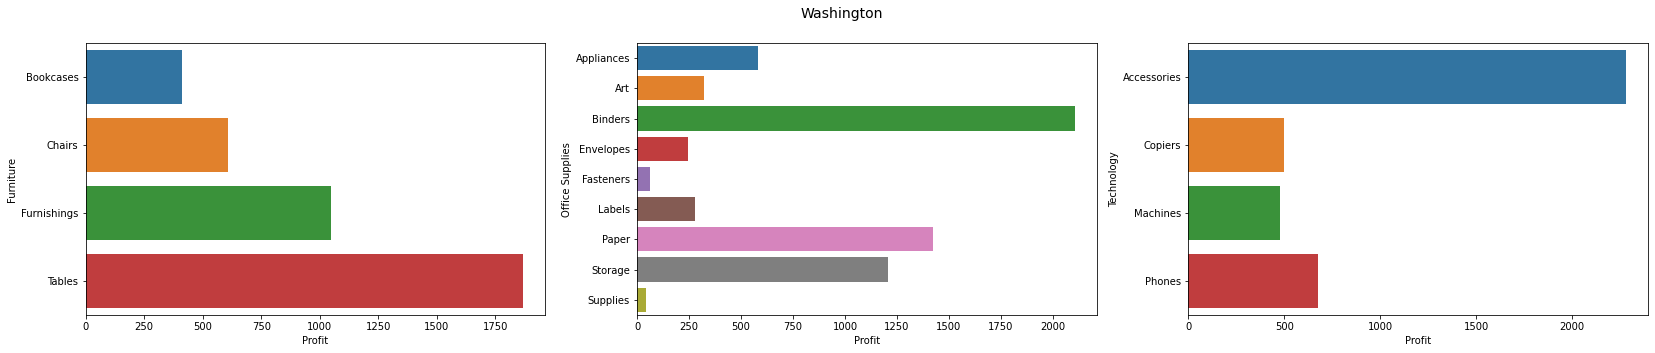

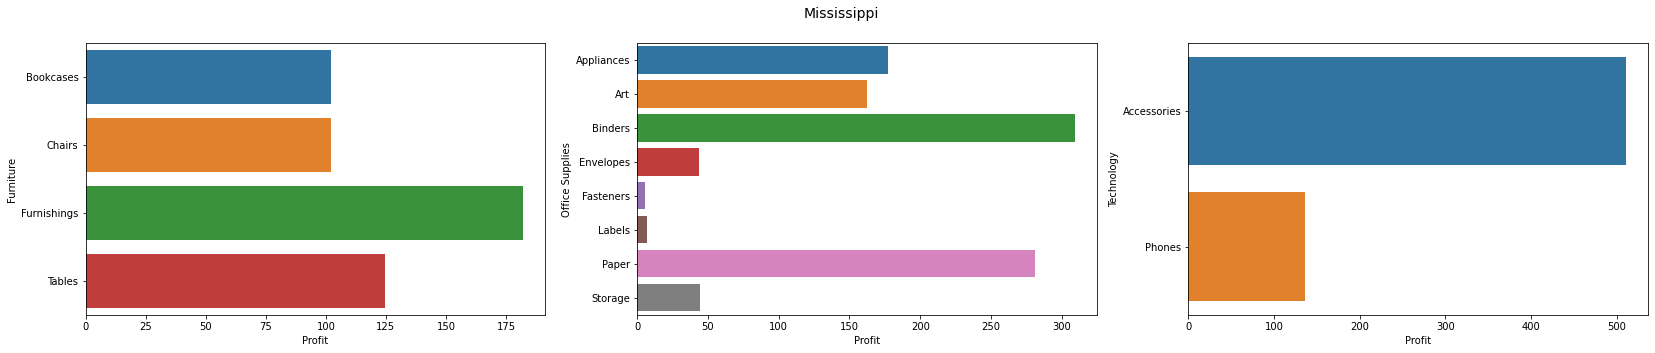

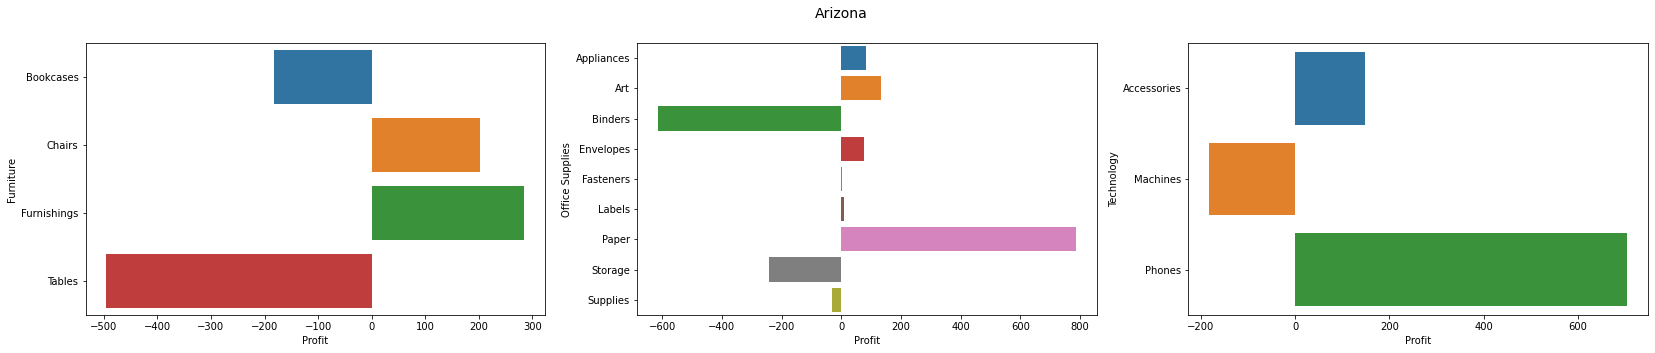

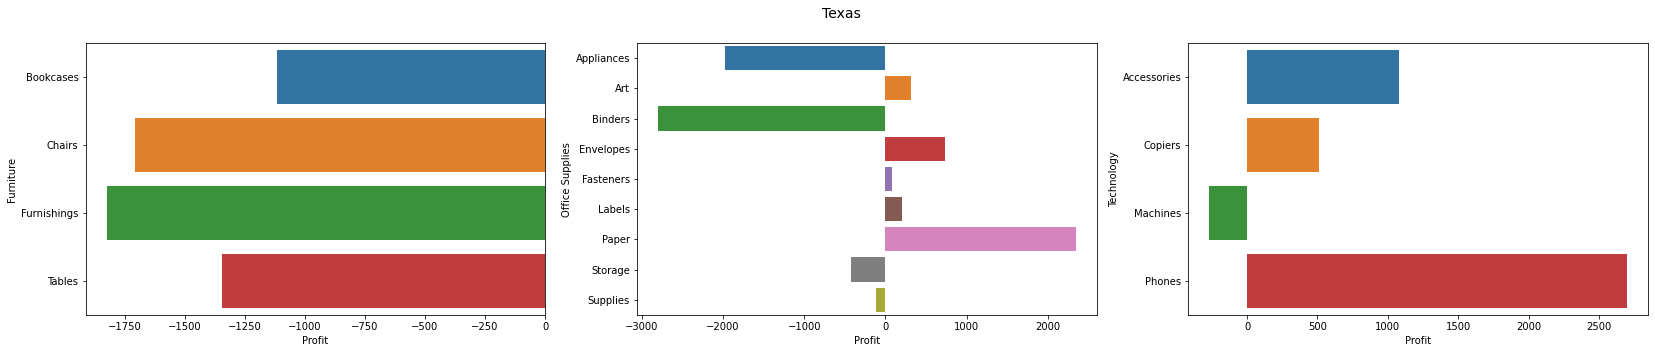

In [41]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

#### Observation - 7: Observations and insights generated from the above given plots:


*   In the state of California, the highest revenue generating state for the supermarket, while all the products sold across each category are generating high-to-low profits, tables in furniture category is generating an overall loss. I verified the same with New York, the second highest revenue generating state.
*   Washington, has a very positive performance, with profits generating over all product categories. A few of the low performing product sub categories are- bookcases, supplies, fasteners, machines and phones. Overall, office supplies and technology categories make the most profit for the supermarket.


*   In the state of Mississippi, a low profit generating state, we see that the Furniture category performs slightly better than the other two categories. The Technology category performs the worst. I observed this same trend in other low profit generating states as well.
*   In low-loss states like Arizona, the highest loss generating sub-categories are- Tables, binders, machines, storage, and book cases.


*   In Texas, the highest loss state, the furniture category is going entirely in loss, generating massive losses for the supermarket. The performance is soo bad that the best option for the supermarket will be to end its furniture business in the state. In case of office supplies category, the binders (generally one of the highest revenue generating sub-category in other states) and appliances are one of the worst performers.







In [42]:
!pip install pywaffle --quiet
from pywaffle import Waffle

In [43]:
mydf.Segment.value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

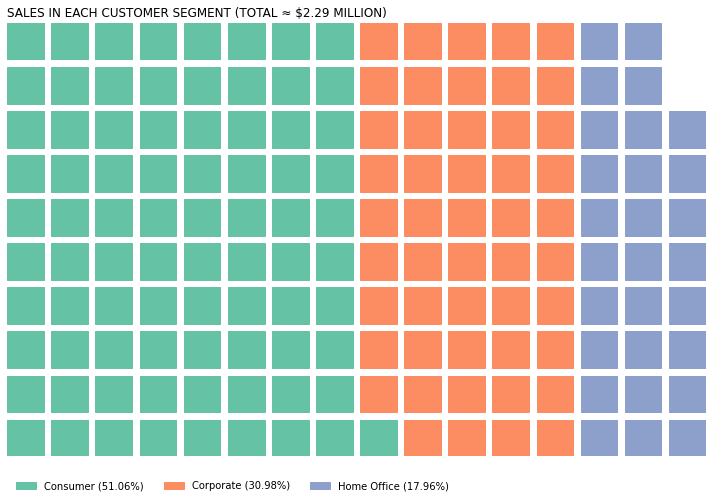

In [44]:
data = mydf[['Segment', 'Sales']].groupby(['Segment']).sum()

# #To plot the waffle Chart 
fig = plt.figure( 
    FigureClass = Waffle,
    figsize=(10, 10),
    rows = 10, 
    values = data.to_numpy()/10000,
    title={'label': 'Sales in Each Customer Segment (Total ≈ $2.29 million)'.upper(), 'loc': 'left'},
    labels=["{} ({:.2f}%)".format(label, percent) for label,percent in zip(list(data.index), (data.Sales/data.Sales.sum()*100).to_numpy())],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.1), 'ncol': len(data), 'framealpha': 0},
)

#### Observation - 9: Observations from the plot above-


*   Around 50% of the total sales were made in the consumer segment which comprises of the individual buyers.
*   The Corporate sector and Home Office segments have around 31% and 19% sales respectively.


Now, let us analyze what percent of profits does each customer section makes for the supermarket.

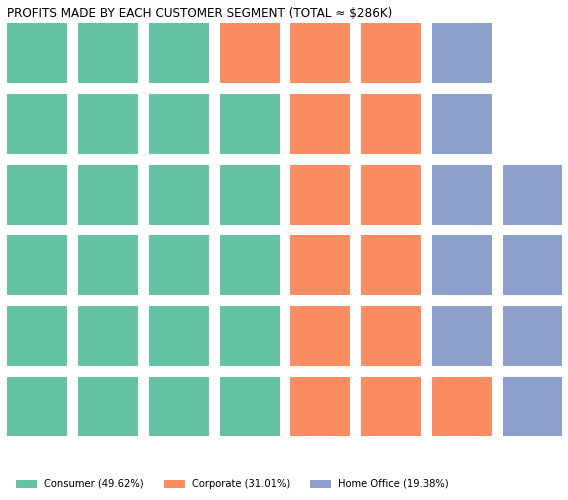

In [45]:
data = mydf[['Segment', 'Profit']].groupby(['Segment']).sum()

#To plot the waffle Chart 
fig = plt.figure( 
    FigureClass = Waffle,
    figsize=(8, 8),
    rows = 6, 
    values = data.to_numpy()/4000,
    title={'label': 'Profits made by Each Customer Segment (Total ≈ $286K)'.upper(), 'loc': 'left'},
    labels=["{} ({:.2f}%)".format(label, percent) for label,percent in zip(list(data.index), (data.Profit/data.Profit.sum()*100).to_numpy())],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.15), 'ncol': len(data), 'framealpha': 0},
)

#### Observation - 10: Some interesting observations here as follows,


*   While the Consumer segment had more than 50% in sales, its total contribution in the profits made by the company is only around 46%. This shows that the company is bearing a higher loss in the Consumer segment.
*   The Corporate and the Home Office segments are returning more profits to the supermarket as compared to the sales made. While their joint sales is around 50%, thier joint profits made for the supermarket is around 54%.



Here, the company can do two things in order to increase their profits. They can look into the reasons why they are bearing more losses in the consumer segment and try to reduce those losses, thus directly increasing the sales.

Other route can be this, the company can take is to providing more polished services to the Corporate and Home Office segments, thus driving them towards more profits.

#### Now, let us observe the prices of products across each product category and try to see how the prices are spread across each product category.

In [46]:
## creating two new rows
mydf['price_per_product'] = mydf.Sales / mydf.Quantity
mydf['profit_per_product'] = mydf.Profit / mydf.Quantity 

data = mydf.groupby(['Category'])

for cat, df in data:
    sizes = np.absolute(df.price_per_product)
    fig = px.scatter(df, x = 'price_per_product', title = cat.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        height = 600,
        xaxis = dict(title='Price Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

Observation - 12: Observation across each product category-


1.   Furniture -


*   If we see the average price, we'll find that most of the tables and chairs are around the $200 mark, making them one of the most expensive furniture items. Some tables go as high as USD 550 while the most expensive chair costs USD 700.
*   The most expensive item in the furniture category is a bookcase costing USD 880.


2.   Office Supplies -


*   Most office supplies fall under the $100 mark.
*   Binders and supplies are the most expensive categories, going as high as  USD 1890.


3.   Technologies - 

*   As per the plot, products in the machines and copiers sub categories are the most expensive technology items.
*   Most products fall under the USD 200 price tag.









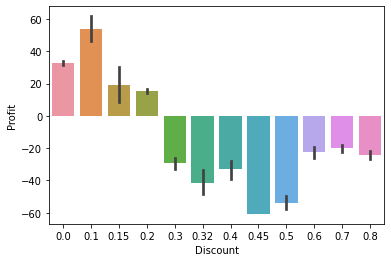

In [47]:
sb.barplot(x=mydf.Discount,y=mydf.Profit)

#### Observation - 13: Here we can see, the profit decreases when the discount increases more than 20%.

#### Now that we have seen the distribution of products across various price brackets, let us have a look at how much each product generates or loses in terms of revenue..

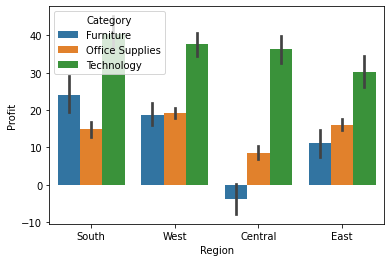

In [48]:
sb.barplot(x=mydf.Region, y=mydf.Profit,hue=mydf.Category)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Sales and Profit Margin with respect to State')

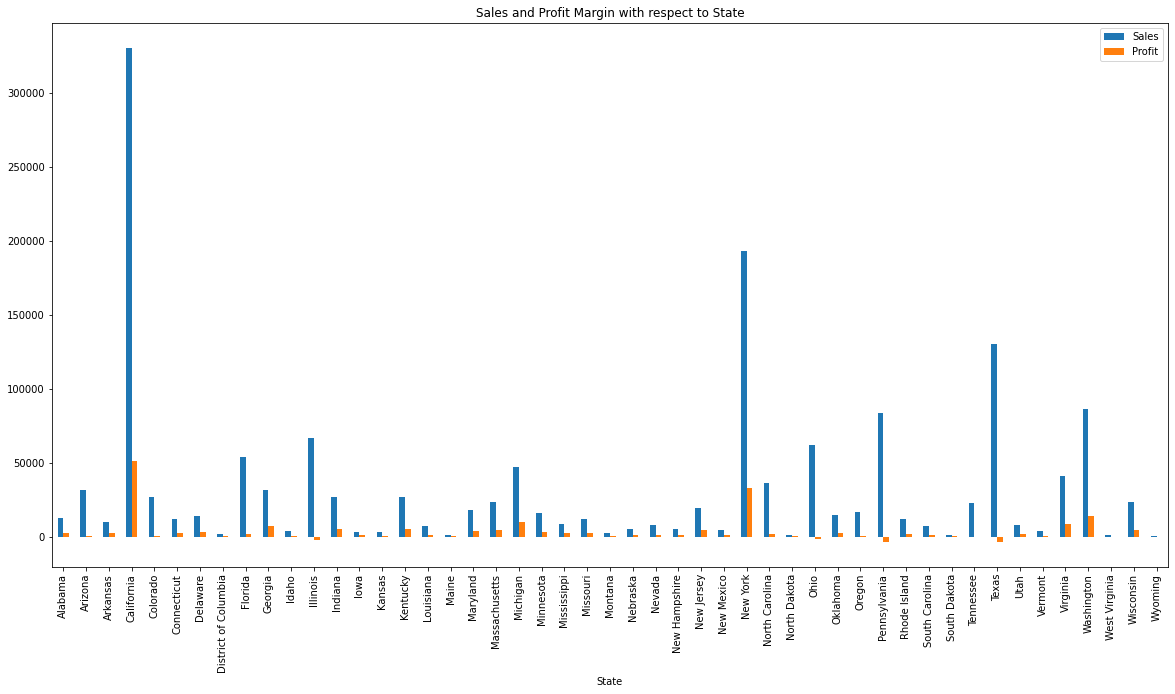

In [49]:
dataplot = mydf.groupby(['State'])['Sales', 'Profit'].sum()
dataplot.plot.bar(figsize = (20,10))
plt.title('Sales and Profit Margin with respect to State')

#### Now that we have seen the distribution of products across various price brackets, let us have a look at how much each product generates or loses in terms of revenue.


In [50]:
for cat, df in data:
    sizes = np.absolute(df.profit_per_product)
    fig = px.scatter(df, x = 'profit_per_product', title = cat.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        autosize = True,
        height = 600,
        xaxis = dict(title='Profit/Loss Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

#### Observation - 14: Observation across each product category- 


1.   Furniture - 

*   Upon observing the plot, it is evident that tables are one of the businesses where the supermarket is losing most of its money.
*   Book cases is another business where the supermarket is mostly just bearing losses.
*   If we see the overall performance, chairs seem to be generating the highest profits for the supermarket.

2.   Office supplies - 
*   While binders generate most revenue for the company, it is also one of the highest-loss sub-categories in the office supplies category.

3.   Technology - 
*   The company's machine sales cause the highest loss, going as high as $1300 in loss.







Note - While the scatter plot gives us a rough idea regarding how and in what sub category the supermarket is losing the money, it's still now clear how each sub category is performing considering the overall data. Let us have a look at the performance of each sub category.

In [51]:
for cat, df in data:
    subCat = df.groupby(['Sub-Category']).sum()
    fig = px.bar(subCat, y = 'Profit', title = cat.upper(), 
                    color = subCat.index)
    fig.update_layout(
        autosize = True,
        height = 500,
        yaxis = dict(title='Profit/Loss Per Product Sub-Category'),
        xaxis = dict(title=''),
    )
    fig.show()

#### Observation - 15: From the above given plots, it is clear that-


*   Tables and Bookcases are the businesses where the company is losing most of its money.
*   While the technology business is making most of the profits for the company, the machines business makes the least profit. The supermarket can improve in that sub-category.


*   Considering the combined turnover from each category, the furniture business is where the company is barely making any consideraable profit. Maybe the shipping modes and shipping costs for the furniture products, which are usually large, has something to do with the low profits/high losses.





Let us have a look at what role the various shipping modes has to play in all this.

First, let us have a look at which shipping method different consumer segments use the most for buying products in different product categories.

In [52]:
mydf['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

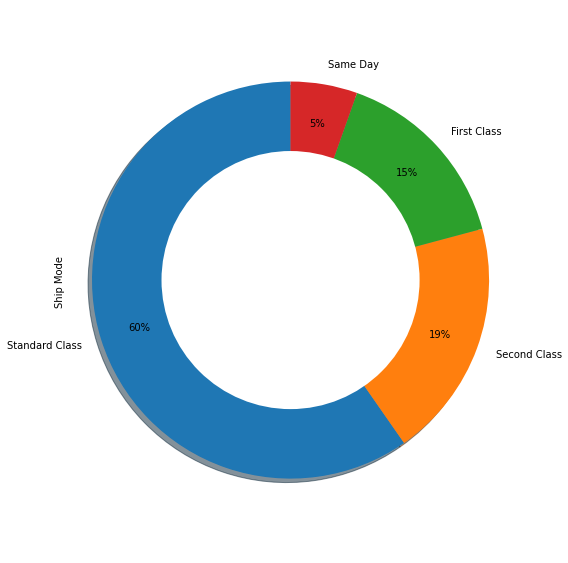

In [53]:
# visualizing with donut chart
mydf['Ship Mode'].value_counts().plot.pie(autopct='%0.f%%', figsize=(8,8), shadow=True, startangle=90, pctdistance=0.80)
circle = plt.Circle((0,0),0.65,fc='white')
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [54]:
mydf['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

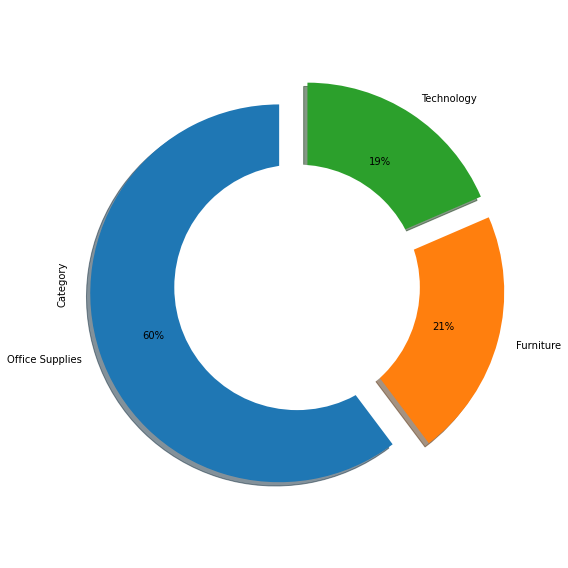

In [55]:
mydf['Category'].value_counts().plot.pie(autopct='%0.f%%', figsize=(8,8), shadow=True, startangle=90, pctdistance=0.70, explode =(0.10,0.10,0.10))
circle = plt.Circle((0,0),0.65,fc='white')
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [56]:
ship_segment = mydf.groupby(['Segment'])
segment_list = mydf.Segment.value_counts().index
category_list = mydf.Category.value_counts().index

for segment in segment_list:
    seg_shipping = ship_segment.get_group(segment)
    standard, second, first, same = [], [], [], []
    for cat in category_list:
        count = seg_shipping.groupby(['Category']).get_group(cat)['Ship Mode'].value_counts()
        standard.append(count[0]), second.append(count[1]), first.append(count[2]), same.append(count[3])
        
    fig = go.Figure()
    fig.add_trace(go.Bar(x = category_list,y = standard,name='Standard Class',marker_color='rgb(137,51,51)'
                        ))
    fig.add_trace(go.Bar(x = category_list,y = second,name='Second Class',marker_color='rgb(234,84,84)'
                        ))
    fig.add_trace(go.Bar(x = category_list,y = first,name='First Class',marker_color='rgb(250,127,78)'
                        ))
    fig.add_trace(go.Bar(x = category_list,y = same,name='Same Day',marker_color='lightsalmon'
                        ))

    fig.update_layout(
        barmode ='group',
        width = 800,
        title = segment.upper(),
        yaxis = dict(title = 'Number of Deliveries'))
    fig.show()

#### Observation - 16: Observations from the above given plot-


*   Standard class shipping is the most used shipping method across all consumer segments and product categories.
*   Across all three consumer segments, office supplies are the most bought products, and the technology items are the least bought products.



Now, let us consider how much loss each shipping category bears.

In [57]:
## creating a new column named 'loss'
mydf['loss'] = mydf.Profit.apply(lambda x: x if (x < 0) else 0)

fig = px.bar(mydf,x = 'Ship Mode', y = 'loss', title = 'Losses in Each Shipping Category'.upper(), 
                    color = 'Ship Mode', hover_data=['loss', 'Sub-Category'])
fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Total Loss'),
        xaxis = dict(title='Shipping Class'),
    )
fig.show()

#### Observation - 17: Observations from the plot above-


*   The highest loss beared by the company was while delivering products via the standard class shipping. This is of no surprise, since most products were delivered using standard shipping. However, one important thing to be noted is that some of the biggest losses beared by the superstore also fall under the standard shipping category, one going as high as USD 6,600 in a single sale.
*   First and second class shipping have almost equal losses. This is also no surprise since the number of sales shipped under each shipping category were also almost equal.



Apart from this information, it doesn't seem that shipping has a major effect on profits or losses as such.

Now, for the last part of our EDA section, we will see how discounts affect the sale of products and the revenue generated by it.

In [58]:
mydf['whether_discount'] = mydf.Discount.apply(lambda x: 'No Discount' if (x == 0) else 'Discount')

discount_data = mydf.groupby(['whether_discount']).mean()

# generating a function which will plot the variation of effects of discount on sale of products and revenue generated by it
def discount_plotter(data_type = 'total'):
    """Plots discount data related plots.
    Arguments:
        data_type- 'total' or 'average', depending on you want the average statistics or total stats.
    """
    color = ['rgb(81,81,246)', 'rgb(209,70,70)']
    if data_type == 'average':
        discount_data = mydf.groupby(['whether_discount']).mean()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
    else:
        discount_data = mydf.groupby(['whether_discount']).sum()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALE', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Sales, marker_color = color),
            row=1, col=1
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Profit, marker_color = color),
            row=1, col=2
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.price_per_product, marker_color = color),
            row=1, col=3
    )
    fig.update_layout(showlegend=False)
    fig.show()
    

discount_plotter('average')
discount_plotter()

#### Observation - 18: Observations from the above given plots-


*   Considering both average and total sales, it seems that people tend to buy more things when it is selling at a discounted price. An average sale at discounted price is of around USD 232 as compared to USD 226 on undiscounted price.
*   On an average, a discounted sale results in a loss of around USD 6 as compared to around USD 66 in profit on a non-discounted sale. Also, the company made a total profit of around USD 320K on non-discount sales, as compared to a loss of around USD 34K on discounted sales.
*   The average price of a discounted product is around USD 62, while the same is around USD 58 for a non-discounted item.





Moreover,while the superstore is incurring losses due to giving discounts on its products, they can't stop giving discounts of their products. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of company's business.

### After Exploratory Data Analysis, our dataset looks like as below,

In [59]:
mydf.sample(7)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,state_code,price_per_product,profit_per_product,loss,whether_discount
2083,Standard Class,Home Office,United States,Houston,Texas,77036,Central,Office Supplies,Labels,23.680000,2,0.20,8.880000,TX,11.840000,4.4400,0.0,Discount
7630,First Class,Home Office,United States,Brownsville,Texas,78521,Central,Technology,Phones,251.944000,7,0.20,88.180397,TX,35.992000,12.5972,0.0,Discount
7354,Standard Class,Home Office,United States,San Francisco,California,94109,West,Office Supplies,Paper,29.900000,5,0.00,13.455000,CA,5.980000,2.6910,0.0,No Discount
6332,Standard Class,Consumer,United States,Westland,Michigan,48185,Central,Furniture,Furnishings,14.730000,3,0.00,4.860900,MI,4.910000,1.6203,0.0,No Discount
1387,Same Day,Home Office,United States,Smyrna,Georgia,30080,South,Office Supplies,Envelopes,167.960007,2,0.00,78.941200,GA,83.980003,39.4706,0.0,No Discount
9663,Standard Class,Consumer,United States,San Francisco,California,94109,West,Office Supplies,Storage,193.949997,3,0.00,9.697500,CA,64.649999,3.2325,0.0,No Discount
4633,Standard Class,Corporate,United States,San Francisco,California,94122,West,Furniture,Bookcases,586.398010,6,0.15,34.493999,CA,97.733002,5.7490,0.0,Discount


Now this dataframe will be delivered to a machine learning algorithm for obtaining or making any predictions or decisions.

<center><h1><b>Thank You !</b></h1></center>